In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data through pandas

In [3]:
insurancedf=pd.read_csv('E:/Learning/Projects/Python_Projects/insurance.csv')
insurancedf

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Data Exploratory Analysis

### No.of Rows and Columns of the data

In [4]:
print('Numberof rows=',insurancedf.shape[0])
print('Numberof columns=',insurancedf.shape[1])

Numberof rows= 1338
Numberof columns= 7


### Information about the data

In [5]:
insurancedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Statistical Information about the data

In [6]:
insurancedf.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Number of male and female customers

In [7]:
customer_no=insurancedf['sex'].value_counts().reset_index()
customer_no

,sex,count
0,male,676
1,female,662


### Created Age_Group Column and rearranged the columns

In [8]:
bins=[18,25,35,50,60,100]
labels=['18-25','25-35','35-50','50-60','60-100']
insurancedf['Age_Group']=pd.cut(insurancedf['age'],bins=bins,labels=labels, right=False)
Changed_Order=['age','Age_Group','sex','bmi','children','smoker','region','charges']
insurancedf[Changed_Order]

,age,Age_Group,sex,bmi,children,smoker,region,charges
0,19,18-25,female,27.900,0,yes,southwest,16884.92400
1,18,18-25,male,33.770,1,no,southeast,1725.55230
2,28,25-35,male,33.000,3,no,southeast,4449.46200
3,33,25-35,male,22.705,0,no,northwest,21984.47061
4,32,25-35,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50,50-60,male,30.970,3,no,northwest,10600.54830
1334,18,18-25,female,31.920,0,no,northeast,2205.98080
1335,18,18-25,female,36.850,0,no,southeast,1629.83350
1336,21,18-25,female,25.800,0,no,southwest,2007.94500


### Number of smokers and non_smokers

In [9]:
insurancedf['smoker'].value_counts().reset_index()

,smoker,count
0,no,1064
1,yes,274


### Number of smokers and non_smokers gender wise

In [10]:
gender_smoker=insurancedf.groupby(['smoker','sex'])['sex'].count()
gender_smoker

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: sex, dtype: int64

### Number of smokers and non_smokers by gender and age_group

In [11]:
insurancedf.groupby(['smoker','Age_Group','sex'])['Age_Group'].count()

smoker  Age_Group  sex   
no      18-25      female    107
                   male      111
        25-35      female    111
                   male      104
        35-50      female    162
                   male      152
        50-60      female    122
                   male      108
        60-100     female     45
                   male       42
yes     18-25      female     27
                   male       33
        25-35      female     21
                   male       35
        35-50      female     39
                   male       51
        50-60      female     15
                   male       26
        60-100     female     13
                   male       14
Name: Age_Group, dtype: int64

### Total insurance charged for smokers and non_smokers

In [12]:
insurancedf.groupby('smoker')['charges'].sum().reset_index()

,smoker,charges
0,no,8.974061e+06
1,yes,8.781764e+06


### Total insurance charged by gender_wise

In [13]:
insurancedf.groupby('sex')['charges'].sum().reset_index()

,sex,charges
0,female,8.321061e+06
1,male,9.434764e+06


### Total charges split by gender and smoker

In [14]:
insurancedf.groupby(['sex','smoker'])['charges'].sum().reset_index()

,sex,smoker,charges
0,female,no,4.792977e+06
1,female,yes,3.528085e+06
2,male,no,4.181085e+06
3,male,yes,5.253679e+06


### Total insurance charges according to age group

In [15]:
insurancedf.groupby('Age_Group')['charges'].sum().reset_index()

,Age_Group,charges
0,18-25,2.505153e+06
1,25-35,2.805498e+06
2,35-50,5.552691e+06
3,50-60,4.470208e+06
4,60-100,2.422274e+06


### Encoding the object column data to find the correlation

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
encoder=LabelEncoder()

In [18]:
insurancedf['sex']=encoder.fit_transform(insurancedf['sex'])
insurancedf['smoker']=encoder.fit_transform(insurancedf['smoker'])
insurancedf['region']=encoder.fit_transform(insurancedf['region'])
insurancedf['Age_Group']=encoder.fit_transform(insurancedf['Age_Group'])
insurancedf

,age,sex,bmi,children,smoker,region,charges,Age_Group
0,19,0,27.900,0,1,3,16884.92400,0
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,1
3,33,1,22.705,0,0,1,21984.47061,1
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,3
1334,18,0,31.920,0,0,0,2205.98080,0
1335,18,0,36.850,0,0,2,1629.83350,0
1336,21,0,25.800,0,0,3,2007.94500,0


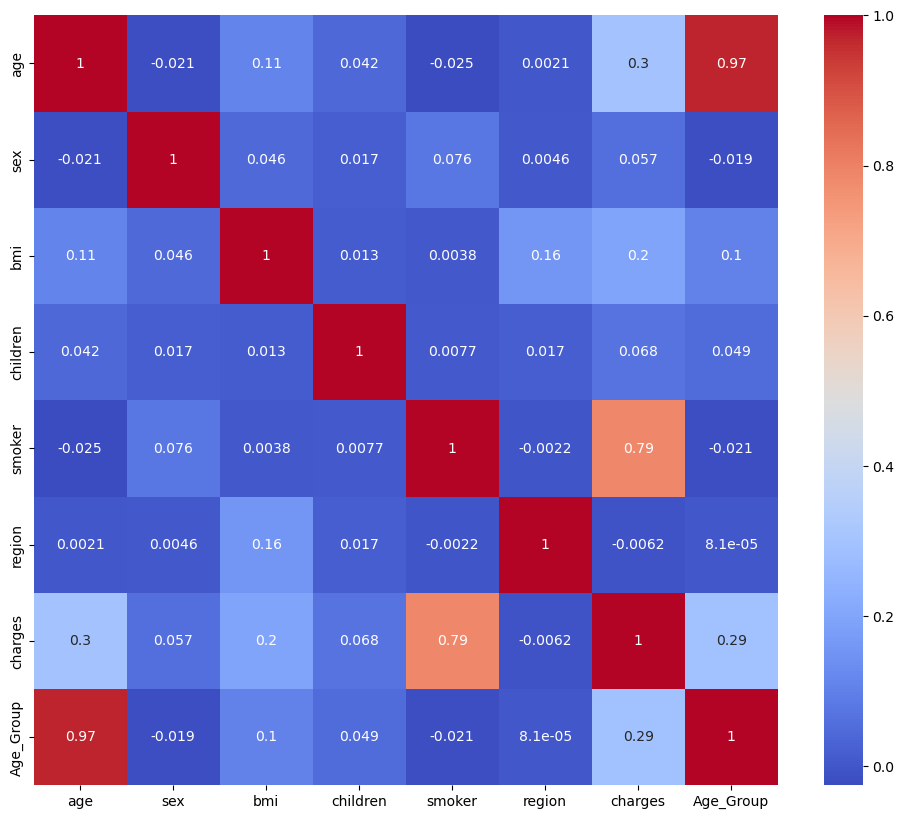

In [20]:
corr=insurancedf.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True, cmap='coolwarm')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
insurancedf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age_Group'],
      dtype='object')

In [59]:
x=insurancedf[['age','sex', 'bmi', 'children','smoker']]
x

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0
...,...,...,...,...,...
1333,50,1,30.970,3,0
1334,18,0,31.920,0,0
1335,18,0,36.850,0,0
1336,21,0,25.800,0,0


In [60]:
y=insurancedf[['charges']]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=43)

In [62]:
x_train

,age,sex,bmi,children,smoker
1306,29,0,21.850,0,1
717,60,1,24.320,1,0
47,28,0,34.770,0,0
890,64,0,26.885,0,1
778,35,1,34.320,3,0
...,...,...,...,...,...
307,30,0,33.330,1,0
16,52,0,30.780,1,0
58,53,0,22.880,1,1
277,22,0,24.300,0,0


In [63]:
x_test

,age,sex,bmi,children,smoker
1162,30,1,38.830,1,0
1191,41,0,21.755,1,0
134,20,0,28.785,0,0
722,62,1,37.400,0,0
1250,24,1,29.830,0,1
...,...,...,...,...,...
796,30,1,44.220,2,0
0,19,0,27.900,0,1
111,55,0,29.700,2,0
18,56,1,40.300,0,0


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
linear=LinearRegression()

In [66]:
linear.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred=linear.predict(x_test)
y_pred

array([[ 8467.72852303],
       [ 5916.34859023],
       [ 2538.88021381],
       [15148.36519452],
       [27259.76335122],
       [ 9482.74249778],
       [10972.62721142],
       [ 7069.05066509],
       [ 9935.29783686],
       [ 1205.68450198],
       [27616.50622428],
       [24457.43453757],
       [10061.95900863],
       [ 8935.98211973],
       [ 2234.47068459],
       [ 5324.62122909],
       [ 3014.46782381],
       [26890.28805636],
       [ 7239.00140402],
       [ 4348.46855001],
       [ 5114.89817633],
       [11299.71735718],
       [ 2596.95008937],
       [11759.45117911],
       [ 7579.01878053],
       [ 6884.69143459],
       [11009.47198392],
       [39582.35942761],
       [ 3021.18503161],
       [12805.84846004],
       [13728.54049075],
       [31732.41800558],
       [14990.86819511],
       [ 2557.24283258],
       [11610.44653002],
       [ 3989.1303118 ],
       [ 8351.67957628],
       [11701.38130354],
       [10168.92983204],
       [ 6322.62836388],


In [68]:
mean_squared_error=mean_squared_error(y_test,y_pred)
print('mean_squared_error={}'.format(mean_squared_error))

mean_squared_error=41031399.106997944


In [69]:
mean_absolute_error=mean_absolute_error(y_test,y_pred)
print('mean_absolute_error={}'.format(mean_absolute_error))

mean_absolute_error=4421.929699239758


In [70]:
r2=r2_score(y_test,y_pred)
print('R_Square_value={}'.format(r2))

R_Square_value=0.7506749357266358


In [71]:
insurancedf.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Age_Group'],
      dtype='object')

So, 'age', 'sex', 'bmi', 'children', 'smoker' affects the charges but age, and smoker influenced the charges 72%

In [72]:
x1=insurancedf[['age','smoker']]

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=43)

In [75]:
y_train

,charges
1306,16115.30450
717,13112.60480
47,3556.92230
890,29330.98315
778,5934.37980
...,...
307,4151.02870
16,10797.33620
58,23244.79020
277,2150.46900


In [77]:
y_test

,charges
1162,18963.17192
1191,13725.47184
134,2457.21115
722,12979.35800
1250,18648.42170
...,...
796,4266.16580
0,16884.92400
111,11881.35800
18,10602.38500


In [81]:
linear.fit(x_train,y_train)

LinearRegression()

In [82]:
y1_pred=linear.predict(x_test)

In [83]:
r2=r2_score(y_test,y1_pred)
print('R_Square_value={}'.format(r2))

R_Square_value=0.7218789354407178


Independent variables age and smoker impacted the insurance charged 72%